##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Face Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect face landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [1]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.3 MB/s eta 0:00:00


Then download the off-the-shelf model bundle(s). Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker#models) for more information about these model bundles.

In [2]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

## Visualization utilities

In [3]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe.tasks.python.vision import drawing_utils
from mediapipe.tasks.python.vision import drawing_styles
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.


    drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=vision.FaceLandmarksConnections.FACE_LANDMARKS_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=drawing_styles.get_default_face_mesh_tesselation_style())
    drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=vision.FaceLandmarksConnections.FACE_LANDMARKS_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=drawing_styles.get_default_face_mesh_contours_style())
    drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=vision.FaceLandmarksConnections.FACE_LANDMARKS_LEFT_IRIS,
          landmark_drawing_spec=None,
          connection_drawing_spec=drawing_styles.get_default_face_mesh_iris_connections_style())
    drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=vision.FaceLandmarksConnections.FACE_LANDMARKS_RIGHT_IRIS,
          landmark_drawing_spec=None,
          connection_drawing_spec=drawing_styles.get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

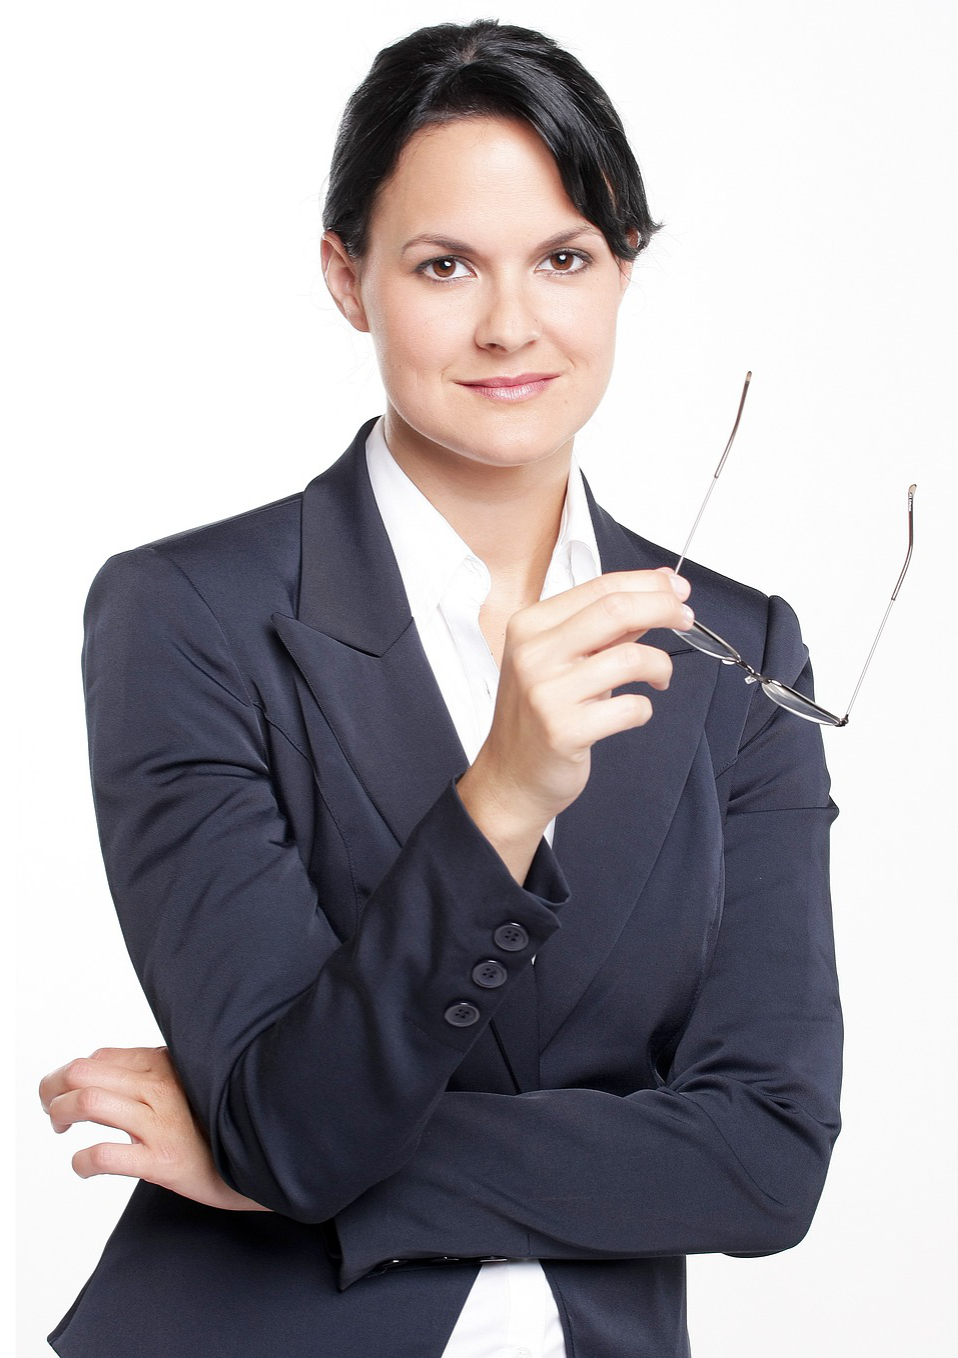

In [4]:
!wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.png")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

Here are the steps to run face landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker/python) to learn more about configuration options that this task supports.


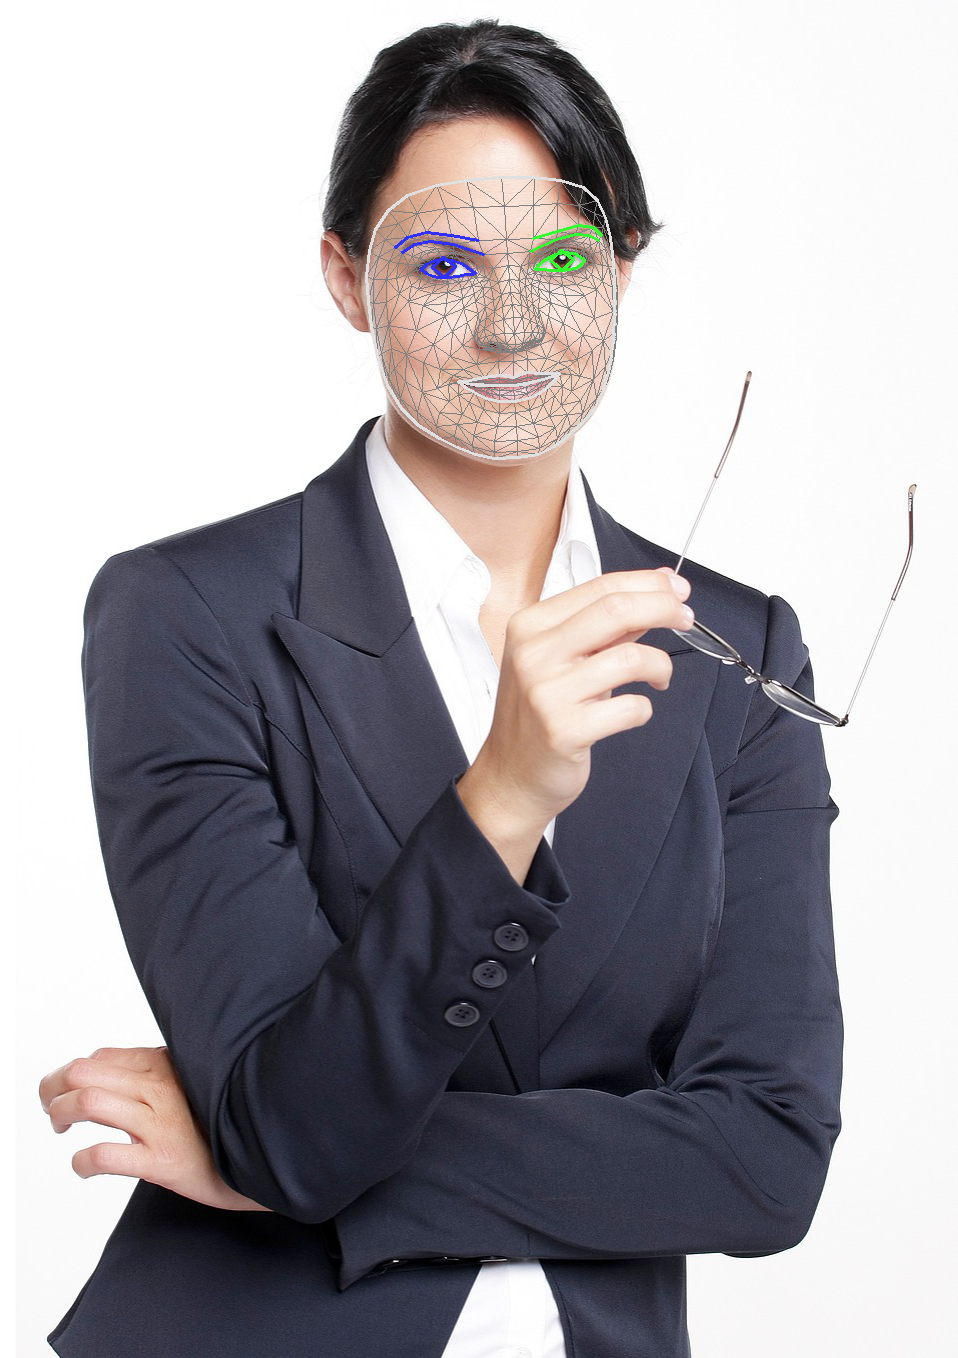

In [5]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.png")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))



We will also visualize the face blendshapes categories using a bar graph.

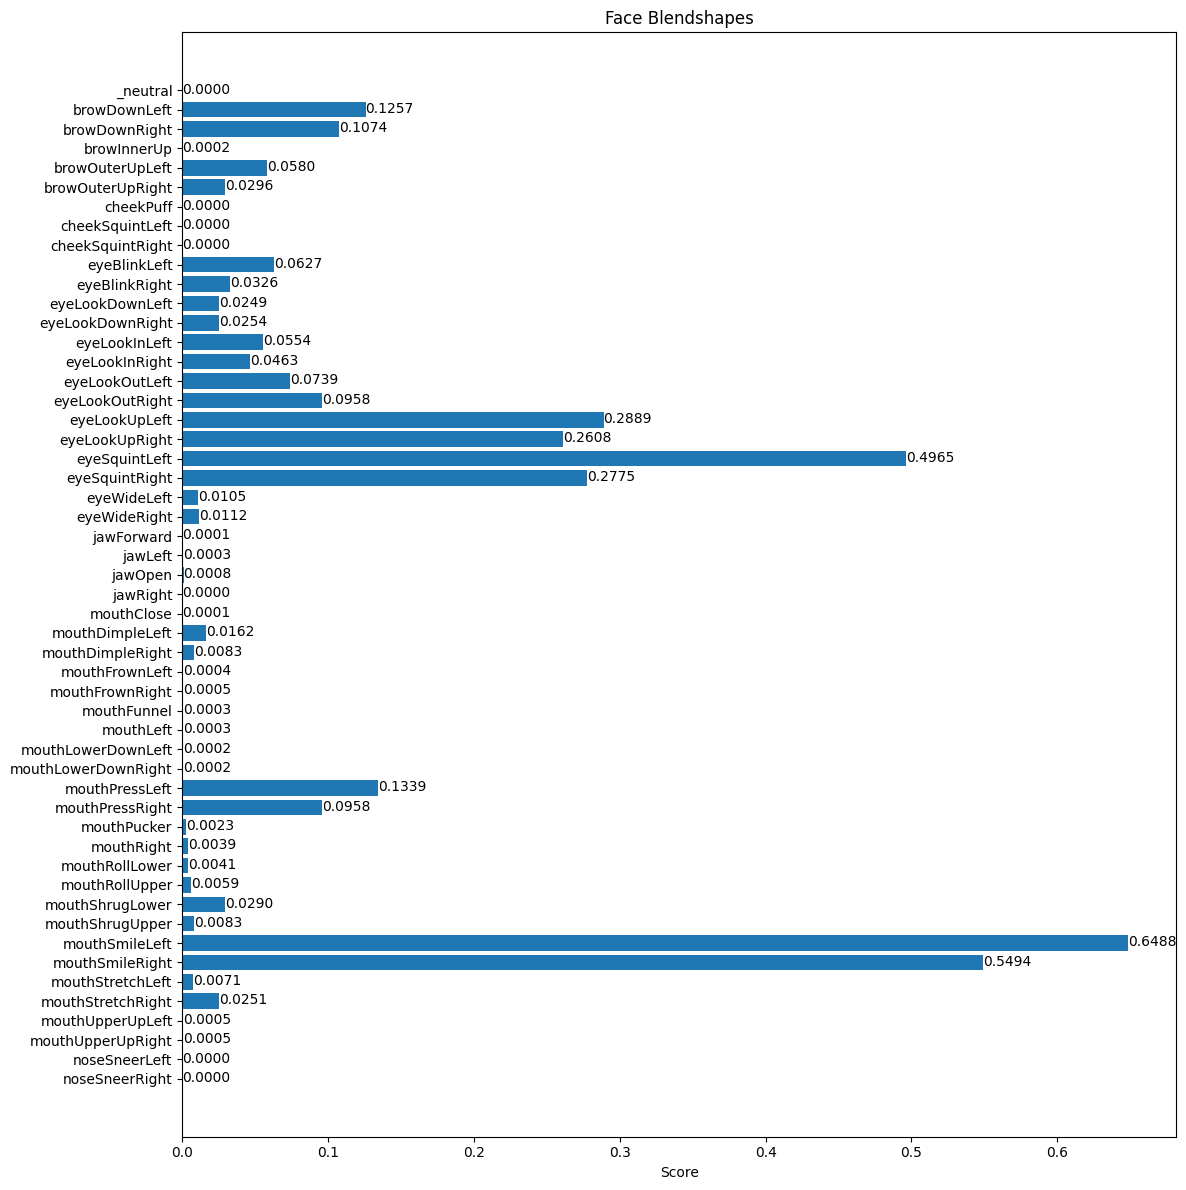

In [6]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

And print the transformation matrix.

In [7]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.9220991e-01, -6.0496215e-02,  1.0890320e-01,  1.1874995e+00],
       [ 9.1046274e-02,  9.4880694e-01, -3.0245045e-01,  2.2372398e+01],
       [-8.5030966e-02,  3.1000933e-01,  9.4692349e-01, -6.8014664e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
      dtype=float32)]


In [9]:
!pip install mediapipe

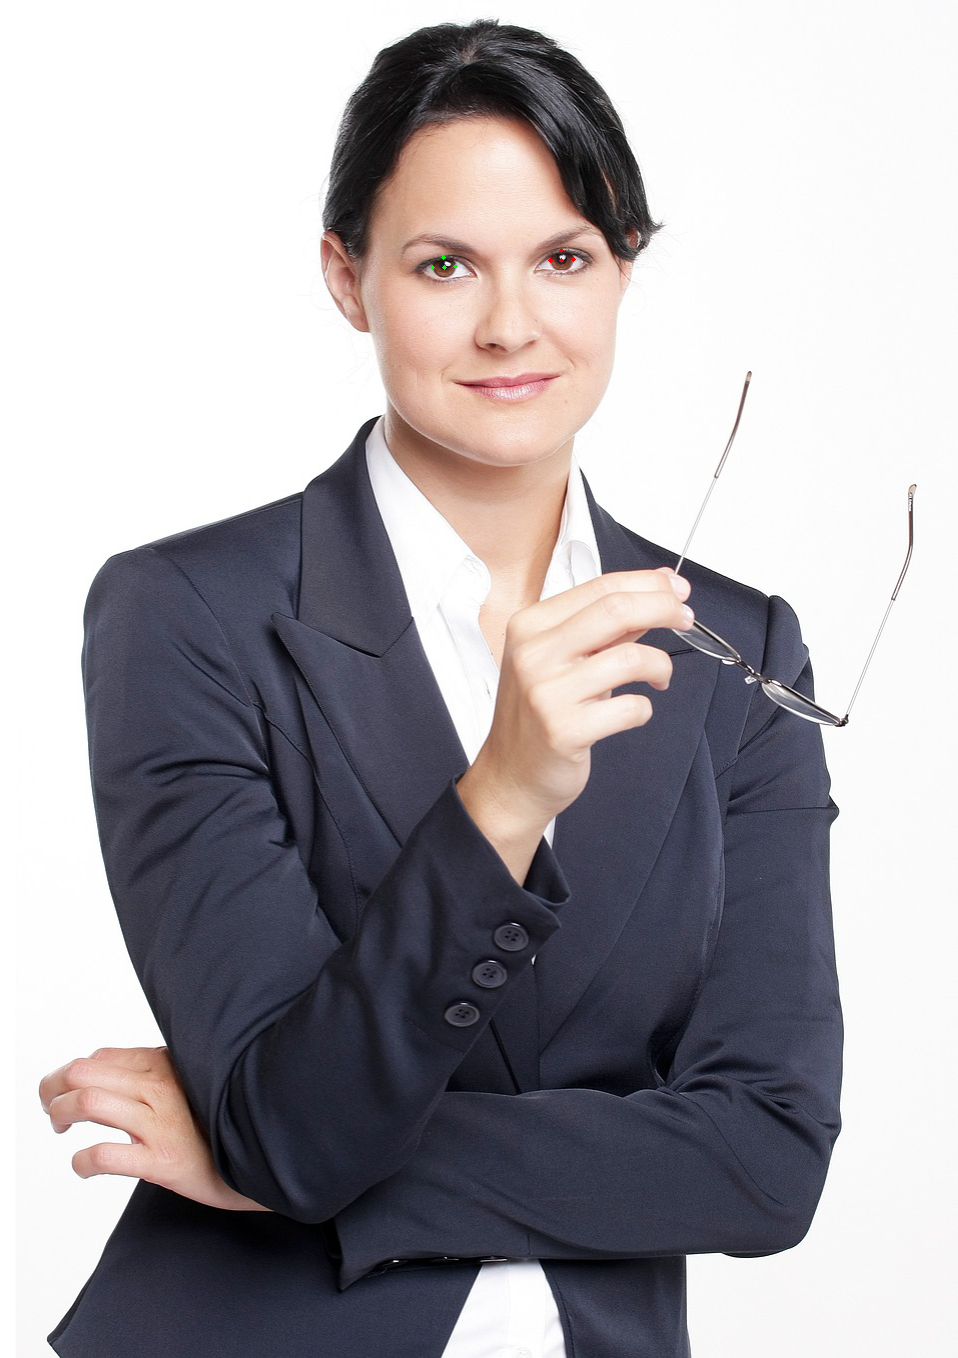

In [11]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab.patches import cv2_imshow # Import for Colab display

# STEP 1 & 2: Create an FaceLandmarker object. (reusing setup from earlier cells)
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# Load image (already in notebook as 'image.png')
# Use mp.Image for MediaPipe Tasks processing
mp_image = mp.Image.create_from_file("image.png")

# Make a copy of the original image (BGR format) to draw on using OpenCV
image_bgr = cv2.imread("image.png")
h, w, _ = image_bgr.shape

# Detect face landmarks from the input image.
detection_result = detector.detect(mp_image)

# Process the detection result and draw iris landmarks
if detection_result.face_landmarks:
    for face_landmarks in detection_result.face_landmarks:

        # LEFT IRIS indices (standard for FaceLandmarker with blendshapes/transformation matrixes enabled)
        left_iris_indices = [468, 469, 470, 471]
        for idx in left_iris_indices:
            landmark = face_landmarks[idx]
            x = int(landmark.x * w)
            y = int(landmark.y * h)
            cv2.circle(image_bgr, (x, y), 2, (0,255,0), -1) # Draw on BGR image

        # RIGHT IRIS indices (standard for FaceLandmarker with blendshapes/transformation matrixes enabled)
        right_iris_indices = [473, 474, 475, 476]
        for idx in right_iris_indices:
            landmark = face_landmarks[idx]
            x = int(landmark.x * w)
            y = int(landmark.y * h)
            cv2.circle(image_bgr, (x, y), 2, (0,0,255), -1) # Draw on BGR image

# Display the image in Colab
cv2_imshow(image_bgr)


In [15]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab.patches import cv2_imshow # For displaying in Colab

# NOTE: The 'draw_landmarks_on_image' function is assumed to be defined in a previous cell (s3E6NFV-00Qt).
# If that cell has not been run, please run it first.

# STEP 1: Create an FaceLandmarker object for video.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1,
                                       running_mode=vision.RunningMode.VIDEO)
detector = vision.FaceLandmarker.create_from_options(options)

# Initialize webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video stream. Please ensure camera access is granted and available.")
else:
    timestamp_ms = 0 # MediaPipe expects timestamps for video mode

    # For demonstration in Colab, we'll process a few frames and display the last one.
    # Live video stream display with cv2.imshow is not supported in Colab.
    processed_frames_count = 0
    max_frames_to_process = 30 # Process a small number of frames for a quick demo
    last_annotated_frame = None

    print(f"Processing up to {max_frames_to_process} frames from the webcam. Live display is not supported.")
    print("A sample annotated frame will be displayed after processing.")

    while cap.isOpened() and processed_frames_count < max_frames_to_process:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame.")
            break

        # Convert the BGR OpenCV frame to RGB format for MediaPipe.
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

        # Detect face landmarks for the current frame.
        detection_result = detector.detect_for_video(mp_image, timestamp_ms)

        # Annotate the frame with landmarks using the helper function.
        if detection_result.face_landmarks:
            annotated_frame_rgb = draw_landmarks_on_image(rgb_frame, detection_result)
            last_annotated_frame = cv2.cvtColor(annotated_frame_rgb, cv2.COLOR_RGB2BGR)
        else:
            last_annotated_frame = frame # If no face detected, keep original frame

        # Increment timestamp for the next frame (assuming ~30 FPS, so ~33ms per frame)
        timestamp_ms += 33
        processed_frames_count += 1

    # Release resources
    cap.release()
    # cv2.destroyAllWindows() # This won't have an effect in Colab.

    # Display the last processed frame if available
    if last_annotated_frame is not None:
        print("Displaying the last processed frame:")
        cv2_imshow(last_annotated_frame)
    else:
        print("No frames were processed or no faces detected.")

# Close the detector to release resources
detector.close()


Error: Could not open video stream. Please ensure camera access is granted and available.


Saving WhatsApp Video 2026-02-16 at 12.20.37.mp4 to WhatsApp Video 2026-02-16 at 12.20.37.mp4
Processing uploaded video...
Processing complete.
Displaying last frame:


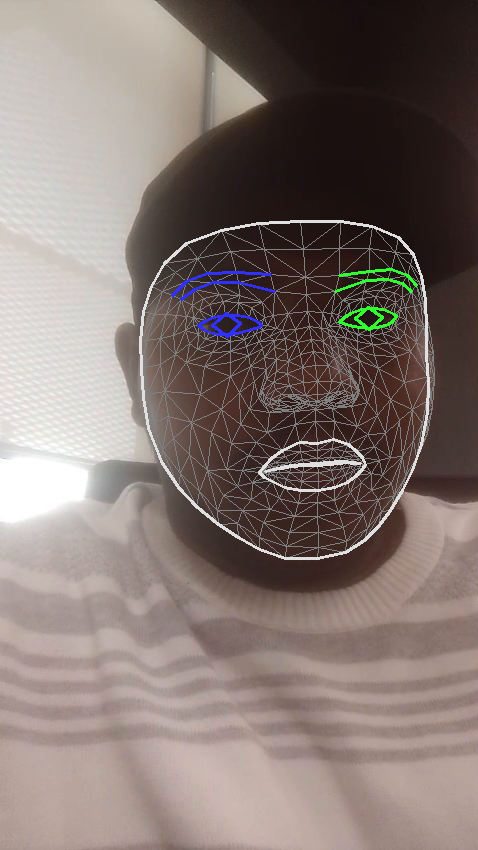

Processed video saved as processed_output.mp4


In [16]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab.patches import cv2_imshow
from google.colab import files

# -------------------------------
# STEP 0: Upload Video File
# -------------------------------
uploaded = files.upload()  # Select video file from your laptop
video_path = list(uploaded.keys())[0]

# -------------------------------
# STEP 1: Create FaceLandmarker
# -------------------------------
base_options = python.BaseOptions(
    model_asset_path='face_landmarker_v2_with_blendshapes.task'
)

options = vision.FaceLandmarkerOptions(
    base_options=base_options,
    output_face_blendshapes=True,
    output_facial_transformation_matrixes=True,
    num_faces=1,
    running_mode=vision.RunningMode.VIDEO
)

detector = vision.FaceLandmarker.create_from_options(options)

# -------------------------------
# STEP 2: Load Uploaded Video
# -------------------------------
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file")
else:
    timestamp_ms = 0
    last_annotated_frame = None

    # Optional: Save processed video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('processed_output.mp4', fourcc, 30,
                          (int(cap.get(3)), int(cap.get(4))))

    print("Processing uploaded video...")

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(
            image_format=mp.ImageFormat.SRGB,
            data=rgb_frame
        )

        detection_result = detector.detect_for_video(mp_image, timestamp_ms)

        if detection_result.face_landmarks:
            annotated_rgb = draw_landmarks_on_image(rgb_frame, detection_result)
            annotated_frame = cv2.cvtColor(annotated_rgb, cv2.COLOR_RGB2BGR)
        else:
            annotated_frame = frame

        out.write(annotated_frame)
        last_annotated_frame = annotated_frame

        timestamp_ms += 33  # assuming ~30fps

    cap.release()
    out.release()
    detector.close()

    print("Processing complete.")

    if last_annotated_frame is not None:
        print("Displaying last frame:")
        cv2_imshow(last_annotated_frame)

    print("Processed video saved as processed_output.mp4")


Saving WhatsApp Video 2026-02-16 at 12.25.42.mp4 to WhatsApp Video 2026-02-16 at 12.25.42.mp4
Tracking iris only...
Done.
Last processed frame:


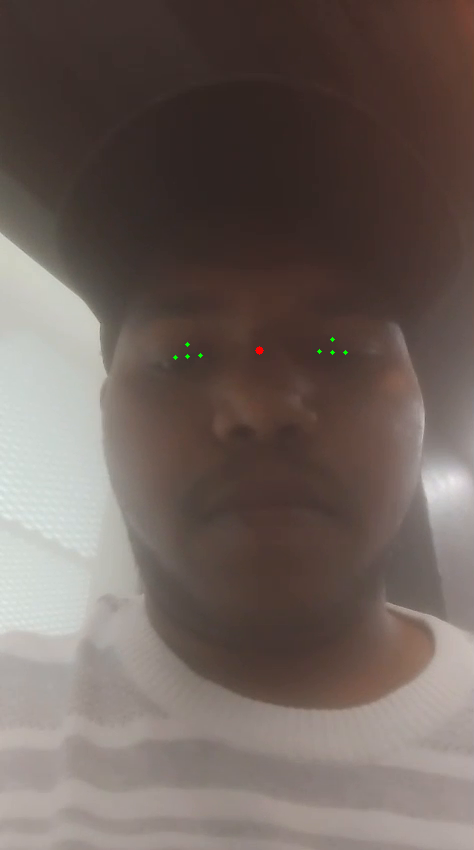

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
import cv2
import mediapipe as mp
import numpy as np
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab import files
from google.colab.patches import cv2_imshow

# -------------------------------
# STEP 0: Upload Video
# -------------------------------
uploaded = files.upload()
video_path = list(uploaded.keys())[0]

# -------------------------------
# STEP 1: Create FaceLandmarker (NO blendshapes)
# -------------------------------
base_options = python.BaseOptions(
    model_asset_path='face_landmarker_v2_with_blendshapes.task'
)

options = vision.FaceLandmarkerOptions(
    base_options=base_options,
    output_face_blendshapes=False,
    output_facial_transformation_matrixes=False,
    num_faces=1,
    running_mode=vision.RunningMode.VIDEO
)

detector = vision.FaceLandmarker.create_from_options(options)

# -------------------------------
# STEP 2: Process Video
# -------------------------------
cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(
    'iris_tracking_output.mp4',
    fourcc,
    30,
    (int(cap.get(3)), int(cap.get(4)))
)

timestamp_ms = 0
last_frame = None

print("Tracking iris only...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(
        image_format=mp.ImageFormat.SRGB,
        data=rgb_frame
    )

    result = detector.detect_for_video(mp_image, timestamp_ms)

    if result.face_landmarks:
        landmarks = result.face_landmarks[0]
        h, w, _ = frame.shape

        # Iris indices
        iris_indices = [468,469,470,471,473,474,475,476]

        iris_points = []

        for idx in iris_indices:
            x = int(landmarks[idx].x * w)
            y = int(landmarks[idx].y * h)
            iris_points.append((x, y))
            cv2.circle(frame, (x, y), 2, (0,255,0), -1)

        # Optional: draw iris center
        iris_center = np.mean(iris_points, axis=0).astype(int)
        cv2.circle(frame, tuple(iris_center), 4, (0,0,255), -1)

    out.write(frame)
    last_frame = frame
    timestamp_ms += 33  # ~30 FPS

cap.release()
out.release()
detector.close()

print("Done.")

if last_frame is not None:
    print("Last processed frame:")
    cv2_imshow(last_frame)

files.download("iris_tracking_output.mp4")


In [20]:
import cv2
import mediapipe as mp
import numpy as np
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab import files
from google.colab.patches import cv2_imshow

# -------------------------------
# Upload Video
# -------------------------------
uploaded = files.upload()
video_path = list(uploaded.keys())[0]

# -------------------------------
# Create FaceLandmarker
# -------------------------------
base_options = python.BaseOptions(
    model_asset_path='face_landmarker_v2_with_blendshapes.task'
)

options = vision.FaceLandmarkerOptions(
    base_options=base_options,
    output_face_blendshapes=False,
    output_facial_transformation_matrixes=False,
    num_faces=1,
    running_mode=vision.RunningMode.VIDEO
)

detector = vision.FaceLandmarker.create_from_options(options)

# -------------------------------
# Helper: Compute EAR
# -------------------------------
def compute_ear(landmarks, top, bottom, left, right, w, h):
    top = np.array([landmarks[top].x * w, landmarks[top].y * h])
    bottom = np.array([landmarks[bottom].x * w, landmarks[bottom].y * h])
    left = np.array([landmarks[left].x * w, landmarks[left].y * h])
    right = np.array([landmarks[right].x * w, landmarks[right].y * h])

    vertical = np.linalg.norm(top - bottom)
    horizontal = np.linalg.norm(left - right)

    return vertical / horizontal

# -------------------------------
# Process Video
# -------------------------------
cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(
    'iris_open_only_output.mp4',
    fourcc,
    30,
    (int(cap.get(3)), int(cap.get(4)))
)

timestamp_ms = 0
EAR_THRESHOLD = 0.20  # Adjust if needed

print("Tracking iris only when eyes are open...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(
        image_format=mp.ImageFormat.SRGB,
        data=rgb_frame
    )

    result = detector.detect_for_video(mp_image, timestamp_ms)

    if result.face_landmarks:
        landmarks = result.face_landmarks[0]
        h, w, _ = frame.shape

        # Compute EAR for both eyes
        left_ear = compute_ear(landmarks, 159,145,33,133, w,h)
        right_ear = compute_ear(landmarks, 386,374,362,263, w,h)

        if left_ear > EAR_THRESHOLD and right_ear > EAR_THRESHOLD:

            # Iris indices
            iris_indices = [468,469,470,471,473,474,475,476]
            iris_points = []

            for idx in iris_indices:
                x = int(landmarks[idx].x * w)
                y = int(landmarks[idx].y * h)
                iris_points.append((x,y))
                cv2.circle(frame, (x,y), 2, (0,255,0), -1)

            iris_center = np.mean(iris_points, axis=0).astype(int)
            cv2.circle(frame, tuple(iris_center), 4, (0,0,255), -1)

        else:
            cv2.putText(frame, "Eyes Closed",
                        (30,50),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        1, (0,0,255), 2)

    out.write(frame)
    timestamp_ms += 33

cap.release()
out.release()
detector.close()

print("Done.")
files.download("iris_open_only_output.mp4")


Saving WhatsApp Video 2026-02-16 at 12.30.41.mp4 to WhatsApp Video 2026-02-16 at 12.30.41.mp4
Tracking iris only when eyes are open...
Done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>